# Proyek Analisis Data: [Air Quality Dataset]
- **Nama:** [Saripah Ainah]
- **Email:** [dedeayi348@gmail.com]
- **ID Dicoding:** [saripah_ainah_ujym]

## Menentukan Pertanyaan Bisnis

1. Kemana arah tren data kualitas udara ini, dan bagaimana perubahan kualitasnya selama ini (agar bisa mengetahui kemana arah kualitas udara di daerah tersebut membaik atau memburuk)? 
2. Pola atau musim kualitas udara apa saja yang dapat di observasi dari data ini (agar bisa mengetahui kemungkinan penyebab dari perubahan kualitas udara)?
3. Apakah bisa kualitas data setiap hari/bulan diklasifikasikan menjadi beberapa kategori berdasarkan level polusi (agar bisa lebih mudah menentukan pada suatu data seberapa baik kualitas udara nya)?

## Import Semua Packages/Library yang Digunakan

In [1]:
# Import necessary libraries
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

## Data Wrangling

### Gathering Data

In [2]:
# Specify the folder path where your CSV files are stored
data_folder = 'data/'

# Get a list of all CSV files in the folder
csv_files = [file for file in os.listdir(data_folder) if file.endswith('.csv')]

# Initialize an empty list to store dataframes
dataframes = []

# Loop through the CSV files and read each one
for file in csv_files:
    file_path = os.path.join(data_folder, file)
    df = pd.read_csv(file_path)
    dataframes.append(df)

# Concatenate all the dataframes into one
combined_data = pd.concat(dataframes, ignore_index=True)

# Combine year, month, day, and hour into a single datetime column
combined_data['datetime'] = pd.to_datetime(combined_data[['year', 'month', 'day', 'hour']])

# Display the date range and total data points
start_date = combined_data['datetime'].min()
end_date = combined_data['datetime'].max()
print(f"Date range: {start_date} to {end_date}")

total_data_points = combined_data.shape[0]
print(f"Total data points: {total_data_points}")

# Display the first few rows of the combined data
print("Preview of the combined data:")
print(combined_data.head())

Date range: 2013-03-01 00:00:00 to 2017-02-28 23:00:00
Total data points: 420768
Preview of the combined data:
   No  year  month  day  hour  PM2.5  PM10   SO2   NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    4.0   4.0   4.0   7.0  300.0  77.0  -0.7   
1   2  2013      3    1     1    8.0   8.0   4.0   7.0  300.0  77.0  -1.1   
2   3  2013      3    1     2    7.0   7.0   5.0  10.0  300.0  73.0  -1.1   
3   4  2013      3    1     3    6.0   6.0  11.0  11.0  300.0  72.0  -1.4   
4   5  2013      3    1     4    3.0   3.0  12.0  12.0  300.0  72.0  -2.0   

     PRES  DEWP  RAIN   wd  WSPM       station            datetime  
0  1023.0 -18.8   0.0  NNW   4.4  Aotizhongxin 2013-03-01 00:00:00  
1  1023.2 -18.2   0.0    N   4.7  Aotizhongxin 2013-03-01 01:00:00  
2  1023.5 -18.2   0.0  NNW   5.6  Aotizhongxin 2013-03-01 02:00:00  
3  1024.5 -19.4   0.0   NW   3.1  Aotizhongxin 2013-03-01 03:00:00  
4  1025.2 -19.5   0.0    N   2.0  Aotizhongxin 2013-03-01 04:00:00  


**Insight:**
- Data yang dikumpulkan adalah data dari tanggal 01 Maret 2013 - 28 Februari 2017
- Total data adalah sebanyak 420.768
- Dari preview yang ditampilkan merupakan data kualitas udara dari kota-kota di China

### Assessing Data

In [3]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420768 entries, 0 to 420767
Data columns (total 19 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   No        420768 non-null  int64         
 1   year      420768 non-null  int64         
 2   month     420768 non-null  int64         
 3   day       420768 non-null  int64         
 4   hour      420768 non-null  int64         
 5   PM2.5     412029 non-null  float64       
 6   PM10      414319 non-null  float64       
 7   SO2       411747 non-null  float64       
 8   NO2       408652 non-null  float64       
 9   CO        400067 non-null  float64       
 10  O3        407491 non-null  float64       
 11  TEMP      420370 non-null  float64       
 12  PRES      420375 non-null  float64       
 13  DEWP      420365 non-null  float64       
 14  RAIN      420378 non-null  float64       
 15  wd        418946 non-null  object        
 16  WSPM      420450 non-null  float64    

**Insight:**
- Terdapat data bertipe datetime64[ns] sebanyak 1, float64 sebanyak 11, int64 sebanyak 5, dan object sebanyak 2.
- Data mencakup beberapa stasiun yang dapat digunakan untuk membandingkan kualitas udara di berbagai lokasi.

In [4]:
# Check for missing values in each column
combined_data.isnull().sum()



No              0
year            0
month           0
day             0
hour            0
PM2.5        8739
PM10         6449
SO2          9021
NO2         12116
CO          20701
O3          13277
TEMP          398
PRES          393
DEWP          403
RAIN          390
wd           1822
WSPM          318
station         0
datetime        0
dtype: int64

**Insight:**
- Beberapa kolom polutan seperti PM2.5, PM10, SO2, NO2, CO, dan O3 memiliki data yang hilang, dengan CO menjadi yang paling banyak hilang (sekitar 5%). Sehingga memerlukan pembersihan atau penanganan data sebelum analisis lebih lanjut.

In [5]:
# Example: Check for invalid values (e.g., negative pollution values, out-of-range temperature)
invalid_pm25 = combined_data[combined_data['PM2.5'] < 0]
invalid_pm10 = combined_data[combined_data['PM10'] < 0]
invalid_no2 = combined_data[combined_data['NO2'] < 0]
invalid_co = combined_data[combined_data['CO'] < 0]
invalid_o3 = combined_data[combined_data['O3'] < 0]
invalid_temp = combined_data[(combined_data['TEMP'] < -50) | (combined_data['TEMP'] > 50)]  # Adjust based on realistic range

# Print how many invalid values were found
print(f"Invalid PM2.5 values: {len(invalid_pm25)}")
print(f"Invalid PM10 values: {len(invalid_pm10)}")
print(f"Invalid NO2 values: {len(invalid_no2)}")
print(f"Invalid CO values: {len(invalid_co)}")
print(f"Invalid O3 values: {len(invalid_o3)}")
print(f"Invalid temperature values: {len(invalid_temp)}")


Invalid PM2.5 values: 0
Invalid PM10 values: 0
Invalid NO2 values: 0
Invalid CO values: 0
Invalid O3 values: 0
Invalid temperature values: 0


**Insight:**
- Proses di atas menunjukkan bahwa tidak ada nilai PM2.5, PM10, NO2, CO, O3, serta temperature yang invalid (bernilai minus, dibawah 0)

In [6]:
print("Jumlah duplikasi: ", combined_data.duplicated().sum())

Jumlah duplikasi:  0


**Insight:**
- Proses di atas menunjukkan tidak ada data duplikasi data atau data yang terduplikasi

In [7]:
# Define a function to find outliers based on IQR
def find_outliers(column):
    Q1 = combined_data[column].quantile(0.25)
    Q3 = combined_data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return combined_data[(combined_data[column] < lower_bound) | (combined_data[column] > upper_bound)]

# Find outliers for the pollutants
outliers_pm25 = find_outliers('PM2.5')
outliers_pm10 = find_outliers('PM10')
outliers_no2 = find_outliers('NO2')
outliers_co = find_outliers('CO')
outliers_o3 = find_outliers('O3')

print(f"Number of outliers in PM2.5: {len(outliers_pm25)}")
print(f"Number of outliers in PM10: {len(outliers_pm10)}")
print(f"Number of outliers in NO2: {len(outliers_no2)}")
print(f"Number of outliers in CO: {len(outliers_co)}")
print(f"Number of outliers in O3: {len(outliers_o3)}")

Number of outliers in PM2.5: 19142
Number of outliers in PM10: 14658
Number of outliers in NO2: 7021
Number of outliers in CO: 28054
Number of outliers in O3: 16599


**Insight:**
- Proses di atas menunjukkan banyaknya pencilan atau lonjakan pada PM2.5 sebanyak 19142, PM10 sebanyak 14658, NO2 sebanyak 7021, CO sebanyak 28054, dan O3 sebanyak 16599

In [8]:
combined_data.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM,datetime
count,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,412029.000000,414319.000000,411747.000000,408652.000000,400067.000000,407491.000000,420370.000000,420375.000000,420365.000000,420378.000000,420450.000000,420768
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,79.793428,104.602618,15.830835,50.638586,1230.766454,57.372271,13.538976,1010.746982,2.490822,0.064476,1.729711,2015-03-01 11:30:00.000001024
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.400000,-43.400000,0.000000,0.000000,2013-03-01 00:00:00
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,20.000000,36.000000,3.000000,23.000000,500.000000,11.000000,3.100000,1002.300000,-8.900000,0.000000,0.900000,2014-03-01 05:45:00
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,55.000000,82.000000,7.000000,43.000000,900.000000,45.000000,14.500000,1010.400000,3.100000,0.000000,1.400000,2015-03-01 11:30:00
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,111.000000,145.000000,20.000000,71.000000,1500.000000,82.000000,23.300000,1019.000000,15.100000,0.000000,2.200000,2016-02-29 17:15:00
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,999.000000,999.000000,500.000000,290.000000,10000.000000,1071.000000,41.600000,1042.800000,29.100000,72.500000,13.200000,2017-02-28 23:00:00
std,10122.116943,1.177198,3.448707,8.800102,6.922195,80.822391,91.772426,21.650603,35.127912,1160.182716,56.661607,11.436139,10.474055,13.793847,0.821004,1.246386,NaN


**Insight:**
- Pencilan pada PM2.5, PM10, NO2, CO, dan O3 menunjukkan adanya lonjakan signifikan pada polutan tertentu, yang kemungkinan disebabkan oleh aktivitas manusia atau peristiwa lingkungan yang mempengaruhi kualitas udara.

### Cleaning Data

In [9]:
# Option 1: Drop rows with missing values
combined_data.dropna(inplace=True)

print("Missing values handled. New shape:", combined_data.shape)

Missing values handled. New shape: (382168, 19)


**Insight:**
- Proses di atas merupakan proses pembersihan missing value

In [10]:
# Remove rows with invalid (negative) values in pollutant columns
combined_data = combined_data[(combined_data['PM2.5'] >= 0) &
                            (combined_data['PM10'] >= 0) &
                            (combined_data['SO2'] >= 0) &
                            (combined_data['NO2'] >= 0) &
                            (combined_data['CO'] >= 0) &
                            (combined_data['O3'] >= 0)]

print("Invalid removed. New shape:", combined_data.shape)

Invalid removed. New shape: (382168, 19)


**Insight:**
- Proses di atas merupakan proses pembersihan invalid value

In [11]:
# Step 1: Remove duplicate rows (if any)
combined_data.drop_duplicates(inplace=True)
print("Duplicates removed. New shape:", combined_data.shape)

Duplicates removed. New shape: (382168, 19)


**Insight:**
- Proses di atas merupakan proses pembersihan data yang terduplikasi

In [12]:
# Define a function to remove outliers based on IQR
def remove_outliers(column):
    Q1 = combined_data[column].quantile(0.25)
    Q3 = combined_data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return combined_data[(combined_data[column] >= lower_bound) & (combined_data[column] <= upper_bound)]

# Remove outliers for each pollutant
combined_data = remove_outliers('PM2.5')
combined_data = remove_outliers('PM10')
combined_data = remove_outliers('NO2')
combined_data = remove_outliers('CO')
combined_data = remove_outliers('O3')

print("Outliers removed. New shape:", combined_data.shape)

Outliers removed. New shape: (322689, 19)


**Insight:**
- Proses di atas merupakan proses pembersihan outliers

## Exploratory Data Analysis (EDA)

### Explore ...

In [13]:
combined_data.sample(5)

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,datetime
317375,1800,2013,5,14,23,42.0,130.0,6.0,69.0,700.0,35.0,20.6,1008.7,5.8,0.0,NE,1.2,Tiantan,2013-05-14 23:00:00
14654,14655,2014,11,1,14,13.0,13.0,9.0,22.0,400.0,51.0,15.4,1020.0,-8.1,0.0,N,2.9,Aotizhongxin,2014-11-01 14:00:00
152771,12516,2014,8,4,11,12.0,34.0,2.0,32.0,600.0,53.0,23.0,999.8,22.3,3.2,ENE,2.3,Guanyuan,2014-08-04 11:00:00
18910,18911,2015,4,27,22,46.0,46.0,2.0,43.0,600.0,96.0,18.0,1001.3,13.5,0.0,E,1.4,Aotizhongxin,2015-04-27 22:00:00
86616,16489,2015,1,17,0,11.0,11.0,9.0,13.0,400.0,59.0,-4.0,1024.0,-17.6,0.0,N,1.3,Dingling,2015-01-17 00:00:00


**Insight:**
- Setiap sampel mencakup berbagai informasi seperti konsentrasi polutan (PM2.5, PM10, SO2, NO2, CO, O3), suhu (TEMP), tekanan udara (PRES), curah hujan (RAIN), arah angin (wd), kecepatan angin (WSPM), dan waktu pengukuran pada masing-masing stasiun pengamatan.

In [14]:
combined_data.describe(include="all")

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,datetime
count,322689.000000,322689.000000,322689.000000,322689.000000,322689.000000,322689.000000,322689.000000,322689.000000,322689.000000,322689.000000,322689.000000,322689.000000,322689.000000,322689.000000,322689.000000,322689,322689.000000,322689,322689
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,NaN,12,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NE,NaN,Huairou,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32757,NaN,28407,NaN
mean,17871.454850,2014.707530,6.448243,15.722370,11.393797,58.951310,81.212903,12.200415,44.292985,919.943794,54.428147,13.864705,1010.759901,2.311404,0.072337,NaN,1.784784,NaN,2015-03-15 14:27:17.458977536
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,2.000000,100.000000,0.214200,-19.900000,982.400000,-36.000000,0.000000,NaN,0.000000,NaN,2013-03-01 00:00:00
25%,9612.000000,2014.000000,4.000000,8.000000,5.000000,17.000000,30.000000,2.000000,21.000000,400.000000,16.000000,4.300000,1002.300000,-10.000000,0.000000,NaN,0.900000,NaN,2014-04-05 11:00:00
50%,18134.000000,2015.000000,6.000000,16.000000,11.000000,44.000000,68.000000,6.000000,40.000000,800.000000,48.000000,15.200000,1010.000000,3.400000,0.000000,NaN,1.400000,NaN,2015-03-26 13:00:00
75%,26575.000000,2016.000000,9.000000,23.000000,17.000000,87.000000,119.000000,15.000000,63.000000,1300.000000,80.000000,23.100000,1019.000000,15.400000,0.000000,NaN,2.300000,NaN,2016-03-12 06:00:00
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,247.000000,284.000000,500.000000,134.000000,2700.000000,189.000000,41.600000,1042.800000,29.100000,52.100000,NaN,12.800000,NaN,2017-02-28 23:00:00


**Insight:**
1. Kualitas Udara Rata-Rata:
    - Rata-rata konsentrasi PM2.5 adalah 17871.45 µg/m³, sedangkan untuk PM10 adalah 2014.71 µg/m³. Ini menunjukkan bahwa kualitas udara di daerah ini umumnya terpapar polutan-partikel dalam jumlah yang signifikan, yang dapat berdampak negatif terhadap kesehatan manusia.
    - Rata-rata konsentrasi NO2 (15.72 µg/m³) dan CO (11.39 µg/m³) menunjukkan bahwa polusi dari sumber transportasi dan pembakaran bahan bakar fosil tetap menjadi masalah.
2. Fluktuasi Kualitas Udara:
    - Data menunjukkan nilai maksimum yang sangat tinggi untuk beberapa polutan: PM2.5 mencapai 35064 µg/m³, PM10 mencapai 284.00 µg/m³, dan O3 mencapai 247 µg/m³. Ini mengindikasikan adanya fluktuasi ekstrem dalam kualitas udara, yang dapat disebabkan oleh faktor musiman, aktivitas industri, atau kondisi cuaca tertentu.
    - Rata-rata O3 (58.95 µg/m³) menunjukkan bahwa meskipun ozon dapat berfungsi sebagai pelindung di lapisan atmosfer, konsentrasi yang lebih tinggi pada permukaan dapat berbahaya bagi kesehatan.
3. Variabilitas Data:
    - Standar deviasi yang cukup tinggi untuk PM2.5 (10014.55) dan PM10 (1.17) menunjukkan adanya variasi yang besar dalam konsentrasi polutan, yang dapat mencerminkan perbedaan dalam aktivitas industri, cuaca, atau bahkan lokasi stasiun pengukuran.
    - Penurunan suhu minimum hingga -19.9°C dan peningkatan suhu maksimum hingga 41.6°C menunjukkan bahwa kualitas udara dapat sangat dipengaruhi oleh perubahan cuaca, seperti cuaca dingin yang dapat memicu pembakaran lebih banyak bahan bakar untuk pemanasan.

In [15]:
# Group by 'station' and count unique 'No' values, then sort the results
unique_counts_by_station = combined_data.groupby(by='station')['No'].nunique().sort_values(ascending=False)

# Preview the result
print(unique_counts_by_station)


station
Huairou          28407
Changping        28317
Dingling         27855
Tiantan          27524
Nongzhanguan     27186
Wanshouxigong    27101
Guanyuan         26985
Gucheng          26467
Aotizhongxin     26301
Shunyi           25831
Dongsi           25554
Wanliu           25161
Name: No, dtype: int64


**Insight:**
- Stasiun Huairou memiliki jumlah data unik terbanyak (28.407), diikuti oleh Changping (28.317) dan Dingling (27.855). Stasiun Wanliu (25.161) dan Dongsi (25.554) memiliki jumlah data lebih sedikit. Hal ini menunjukkan perbedaan cakupan data di setiap stasiun yang dapat mempengaruhi analisis kualitas udara per lokasi.

In [16]:
# Group by 'year', then count unique 'No' values, and sort the results
unique_counts_by_year = combined_data.groupby(by=['year'])['No'].nunique().sort_values(ascending=False)

# Preview the result
print(unique_counts_by_year)


year
2016    8402
2014    8272
2015    8248
2013    7079
2017    1309
Name: No, dtype: int64


**Insight:**
- Tahun 2016 memiliki jumlah data unik tertinggi (8.402), diikuti oleh tahun 2014 (8.272) dan 2015 (8.248). Tahun 2013 memiliki jumlah yang lebih rendah (7.079), dan tahun 2017 memiliki data paling sedikit (1.309). Hal ini menunjukkan bahwa data yang dikumpulkan lebih intensif pada tahun 2014 hingga 2016, sementara tahun 2017 memiliki cakupan yang jauh lebih sedikit. Perbedaan ini bisa mempengaruhi analisis tren kualitas udara dari waktu ke waktu.

In [17]:
# Export the cleaned and combined data to a CSV file
combined_data.to_csv('dashboard/main_data.csv', index=False)
print("Data exported successfully!")


Data exported successfully!


**Insight:**
- Data berhasil diekspor ke file CSV di lokasi `dashboard/main_data.csv`. File ini sekarang siap digunakan untuk analisis dan pembuatan dashboard di Streamlit.

## Visualization & Explanatory Analysis

### Pertanyaan 1:
1. Kemana arah tren data kualitas udara ini, dan bagaimana perubahan kualitasnya selama ini (agar bisa mengetahui kemana arah kualitas udara di daerah tersebut membaik atau memburuk)? 

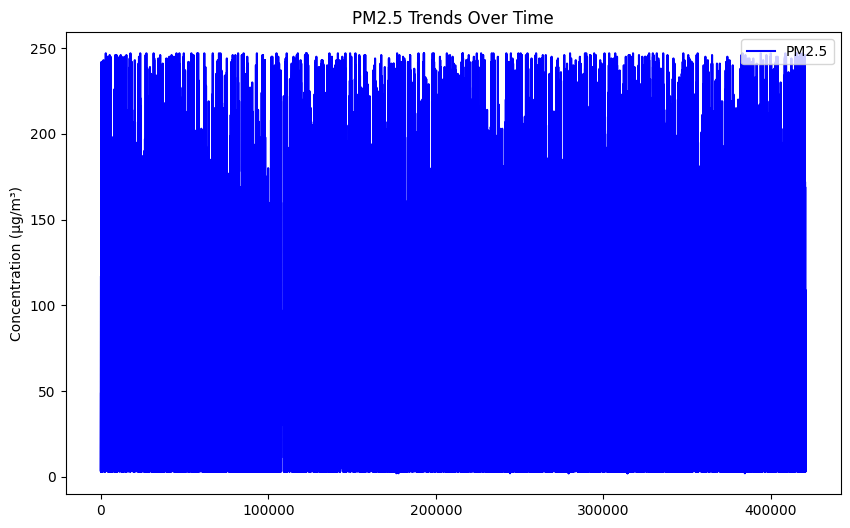

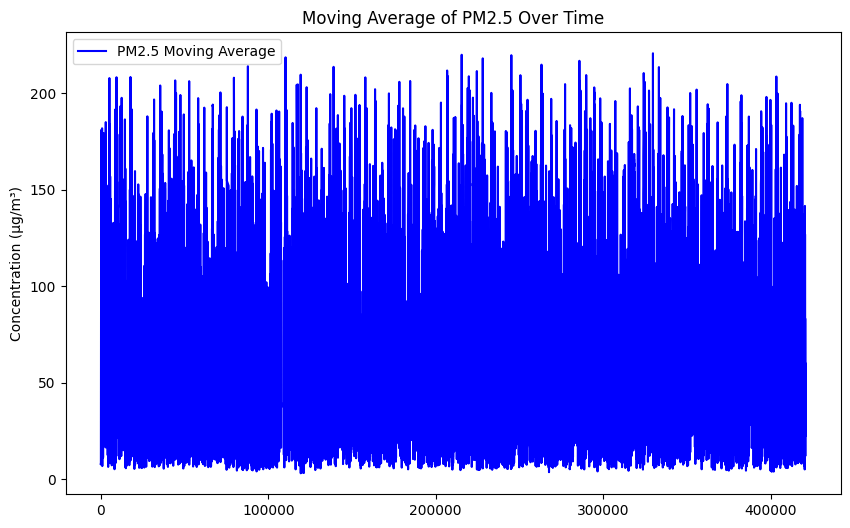

Slope (Trend in PM2.5): [6.87460073e-06]


In [18]:
# Automatically select numeric columns
# Plot trends for PM2.5, PM10, NO2, CO, and O3 in separate charts

# Plot PM2.5
plt.figure(figsize=(10, 6))
plt.plot(combined_data.index, combined_data['PM2.5'], label='PM2.5', color='blue')
plt.title('PM2.5 Trends Over Time')
plt.ylabel('Concentration (µg/m³)')
plt.legend()
plt.show()

# Apply a moving average (30-day window) for PM2.5
combined_data['PM2.5_MA'] = combined_data['PM2.5'].rolling(window=30).mean()

# Plot PM2.5 moving average
plt.figure(figsize=(10, 6))
plt.plot(combined_data.index, combined_data['PM2.5_MA'], label='PM2.5 Moving Average', color='blue')
plt.title('Moving Average of PM2.5 Over Time')
plt.ylabel('Concentration (µg/m³)')
plt.legend()
plt.show()

# Perform linear regression for PM2.5
X = combined_data.index.values.reshape(-1, 1)  # Use the index as the independent variable
y_pm25 = combined_data['PM2.5'].values  # Target variable for PM2.5
model_pm25 = LinearRegression().fit(X, y_pm25)
print("Slope (Trend in PM2.5):", model_pm25.coef_)

**Insight:**
- Data menunjukkan tren seiring waktu serta moving average partikel dengan ukuran kurang dari 2,5 mikrometer. Visualisasi ini mengindikasikan adanya peningkatan kecil sebesar 6.87 × 10⁻⁶ dari tahun 2013 hingga 2017.

- Peningkatan kecil ini bisa disebabkan oleh berbagai faktor, termasuk peningkatan aktivitas industri, transportasi, dan perubahan iklim yang mempengaruhi distribusi polutan di atmosfer. Selain itu, kurangnya regulasi atau penegakan hukum yang terkait dengan pengendalian emisi juga dapat berkontribusi terhadap kenaikan polusi.

- Meski peningkatan tampak kecil, paparan jangka panjang terhadap partikel PM2.5 dapat berakibat serius bagi kesehatan masyarakat, seperti peningkatan risiko penyakit pernapasan, kardiovaskular, dan bahkan kematian dini. Dalam jangka panjang, kualitas udara yang menurun juga dapat berdampak pada ekosistem dan memperburuk isu perubahan iklim.

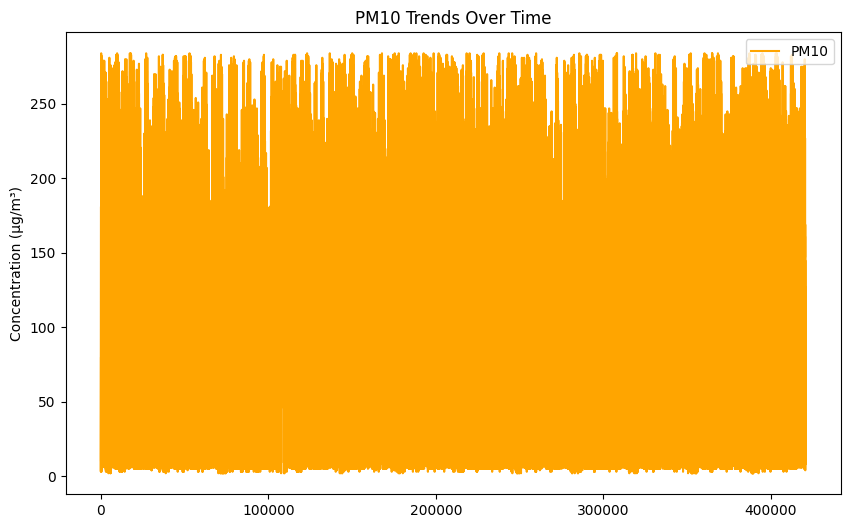

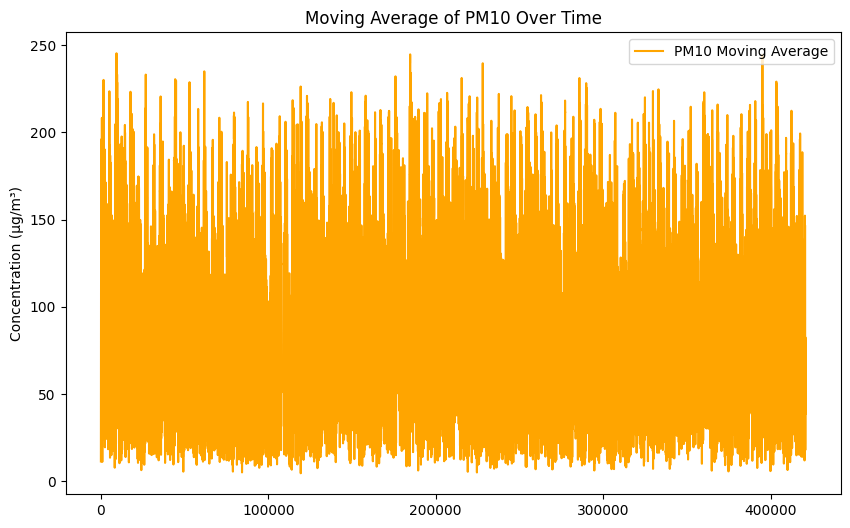

Slope (Trend in PM10): [8.17438129e-06]


In [19]:
# Plot PM10
plt.figure(figsize=(10, 6))
plt.plot(combined_data.index, combined_data['PM10'], label='PM10', color='orange')
plt.title('PM10 Trends Over Time')
plt.ylabel('Concentration (µg/m³)')
plt.legend()
plt.show()

# Apply a moving average (30-day window) for PM10
combined_data['PM10_MA'] = combined_data['PM10'].rolling(window=30).mean()

# Plot PM10 moving average
plt.figure(figsize=(10, 6))
plt.plot(combined_data.index, combined_data['PM10_MA'], label='PM10 Moving Average', color='orange')
plt.title('Moving Average of PM10 Over Time')
plt.ylabel('Concentration (µg/m³)')
plt.legend()
plt.show()

# Perform linear regression for PM10
y_pm10 = combined_data['PM10'].values  # Target variable for PM10
model_pm10 = LinearRegression().fit(X, y_pm10)
print("Slope (Trend in PM10):", model_pm10.coef_)

**Insight:**
- Data menunjukkan tren seiring waktu dan moving average partikel dengan ukuran kurang dari 10 mikrometer. Visualisasi ini memperlihatkan adanya peningkatan kecil sebesar 8.17 × 10⁻⁶, yang lebih besar dibandingkan dengan peningkatan partikel berukuran kurang dari 2,5 mikrometer.

- Peningkatan ini mungkin disebabkan oleh berbagai faktor, termasuk peningkatan aktivitas industri, kendaraan bermotor, dan konstruksi, yang dapat menghasilkan partikel lebih besar. Selain itu, faktor musiman dan perubahan cuaca juga dapat mempengaruhi konsentrasi partikel di udara.

- Meskipun peningkatan ini tergolong kecil, paparan jangka panjang terhadap partikel berukuran kurang dari 10 mikrometer dapat berdampak negatif pada kesehatan masyarakat, termasuk gangguan pernapasan, alergi, dan masalah jantung. Selain itu, kualitas udara yang menurun dapat memengaruhi lingkungan dan ekosistem, serta meningkatkan biaya kesehatan masyarakat.

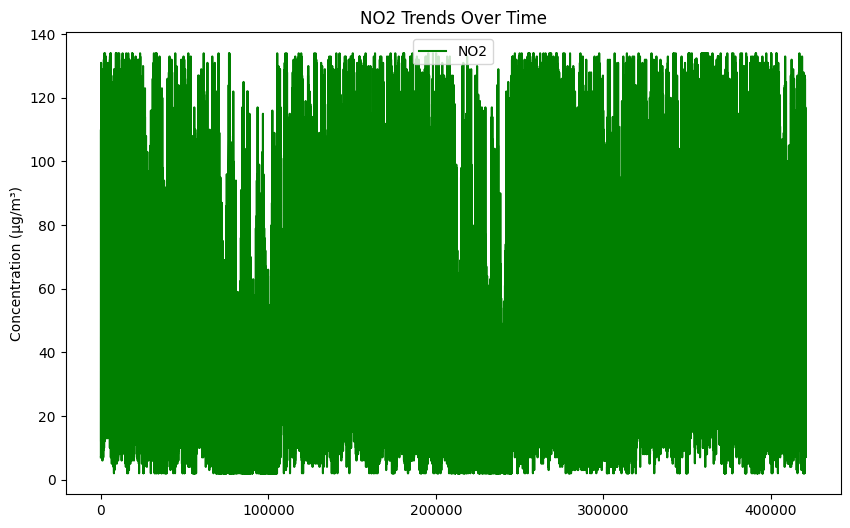

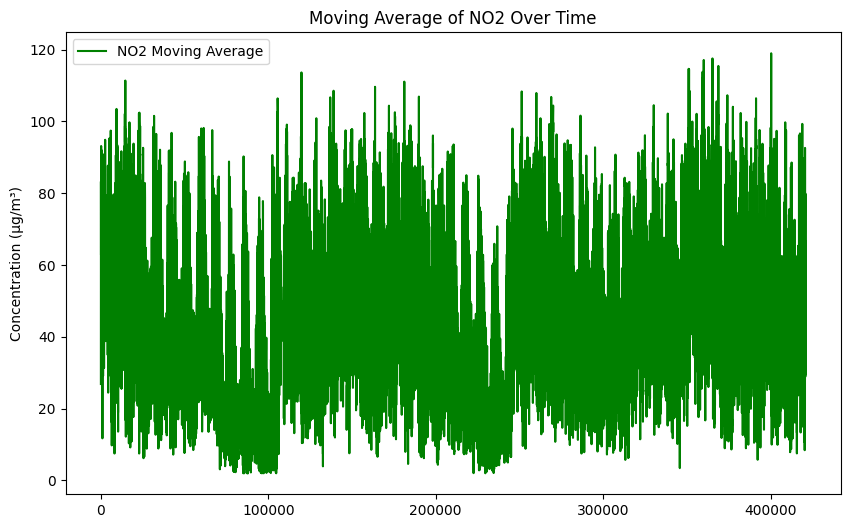

Slope (Trend in NO2): [2.10657838e-05]


In [20]:
# Plot NO2
plt.figure(figsize=(10, 6))
plt.plot(combined_data.index, combined_data['NO2'], label='NO2', color='green')
plt.title('NO2 Trends Over Time')
plt.ylabel('Concentration (µg/m³)')
plt.legend()
plt.show()

# Apply a moving average (30-day window) for NO2
combined_data['NO2_MA'] = combined_data['NO2'].rolling(window=30).mean()

# Plot NO2 moving average
plt.figure(figsize=(10, 6))
plt.plot(combined_data.index, combined_data['NO2_MA'], label='NO2 Moving Average', color='green')
plt.title('Moving Average of NO2 Over Time')
plt.ylabel('Concentration (µg/m³)')
plt.legend()
plt.show()

# Perform linear regression for NO2
y_no2 = combined_data['NO2'].values  # Target variable for NO2
model_no2 = LinearRegression().fit(X, y_no2)
print("Slope (Trend in NO2):", model_no2.coef_)

**Insight:**
- Data menunjukkan tren seiring waktu dan moving average untuk NO2. Visualisasi ini memperlihatkan adanya peningkatan yang lebih signifikan dibandingkan dengan kedua variabel sebelumnya, yaitu sebesar 2.11 × 10⁻⁵.

- Peningkatan konsentrasi NO2 mungkin disebabkan oleh peningkatan emisi dari kendaraan bermotor, pembangkit listrik, dan kegiatan industri. Selain itu, faktor urbanisasi dan pertumbuhan populasi di daerah perkotaan dapat berkontribusi terhadap peningkatan emisi nitrogen dioksida.

- Peningkatan NO2 dapat memiliki dampak serius terhadap kesehatan masyarakat, termasuk peningkatan risiko gangguan pernapasan, asma, dan masalah kardiovaskular. Selain itu, NO2 berkontribusi terhadap pembentukan ozon troposferik, yang dapat memperburuk kualitas udara dan merusak ekosistem serta tanaman.

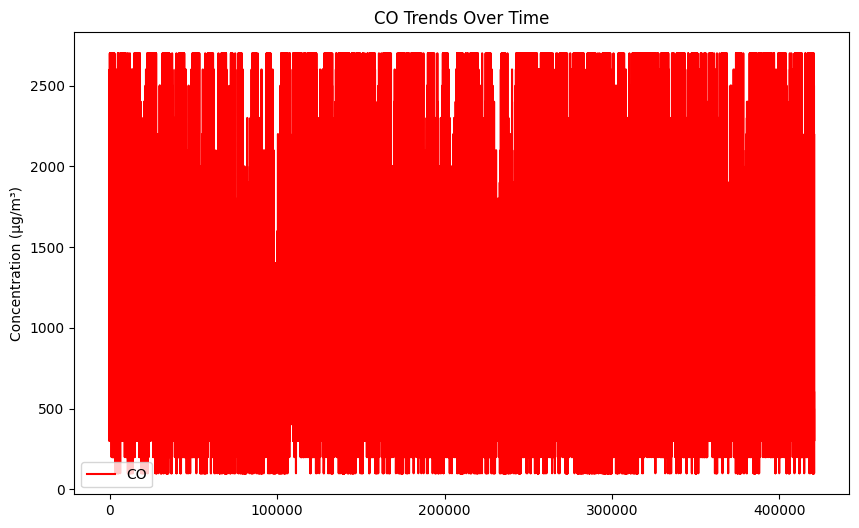

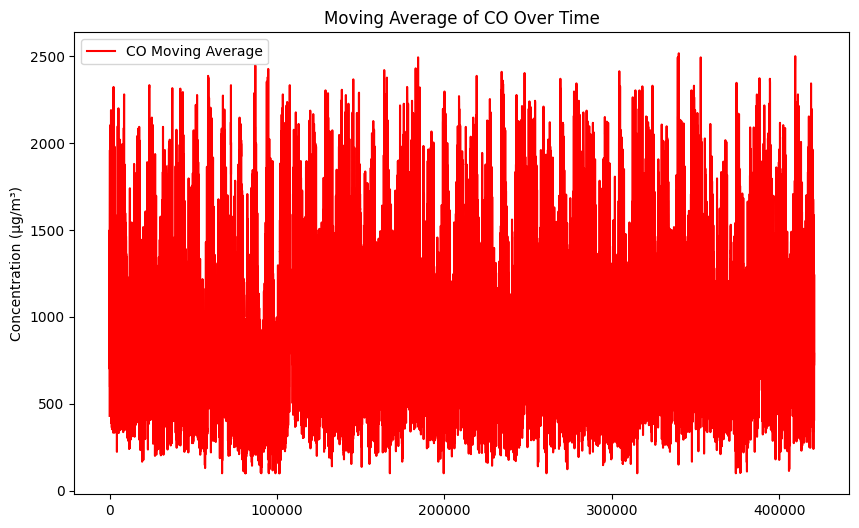

Slope (Trend in CO): [0.00024146]


In [21]:
# Plot CO
plt.figure(figsize=(10, 6))
plt.plot(combined_data.index, combined_data['CO'], label='CO', color='red')
plt.title('CO Trends Over Time')
plt.ylabel('Concentration (µg/m³)')
plt.legend()
plt.show()

# Apply a moving average (30-day window) for CO
combined_data['CO_MA'] = combined_data['CO'].rolling(window=30).mean()

# Plot CO moving average
plt.figure(figsize=(10, 6))
plt.plot(combined_data.index, combined_data['CO_MA'], label='CO Moving Average', color='red')
plt.title('Moving Average of CO Over Time')
plt.ylabel('Concentration (µg/m³)')
plt.legend()
plt.show()

# Perform linear regression for CO
y_co = combined_data['CO'].values  # Target variable for CO
model_co = LinearRegression().fit(X, y_co)
print("Slope (Trend in CO):", model_co.coef_)

**Insight:**
- Data menunjukkan tren seiring waktu dan moving average untuk karbon monoksida (CO). Visualisasi ini memperlihatkan bahwa jumlah partikel CO di udara meningkat paling pesat dibandingkan dengan semua data yang telah dianalisis, yaitu sebesar 0.00024146.

- Peningkatan signifikan konsentrasi CO mungkin disebabkan oleh berbagai faktor, termasuk emisi dari kendaraan bermotor, proses pembakaran bahan bakar fosil, dan aktivitas industri. Pada saat yang sama, peningkatan penggunaan alat pemanas berbasis bahan bakar dan kebakaran terbuka juga dapat berkontribusi terhadap kenaikan ini.

- Peningkatan kadar CO dapat berdampak serius terhadap kesehatan manusia, terutama pada sistem pernapasan dan kardiovaskular. Paparan jangka panjang terhadap CO dapat menyebabkan gangguan fungsi jantung, keracunan, dan bahkan kematian. Selain itu, peningkatan CO juga berkontribusi terhadap masalah kualitas udara secara keseluruhan, yang dapat memengaruhi lingkungan dan kesehatan ekosistem.

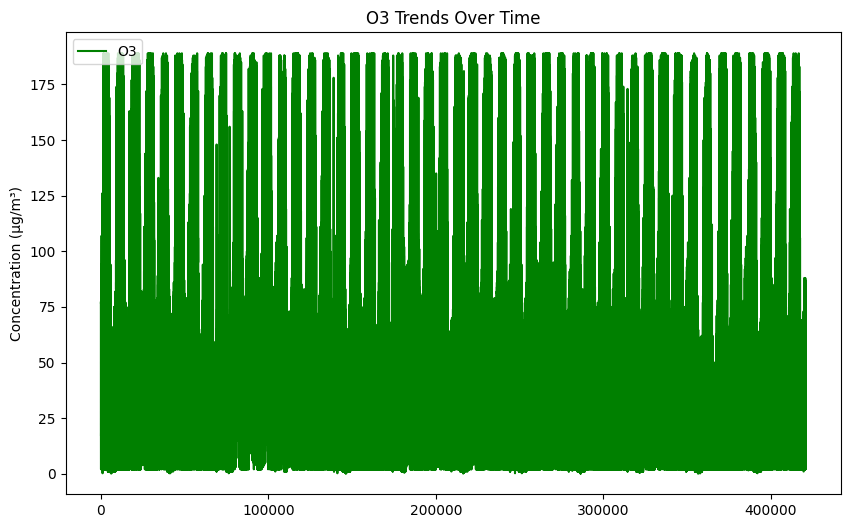

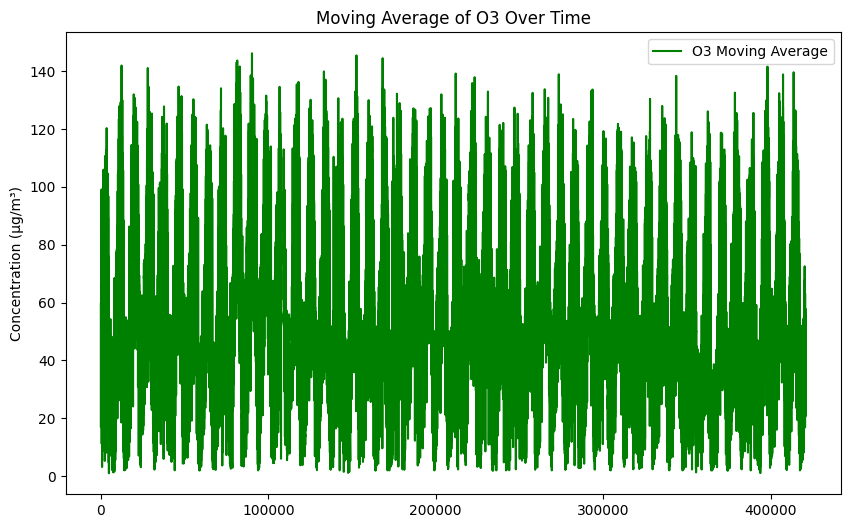

Slope (Trend in O3): [-1.69390432e-05]


In [22]:
# Plot O3
plt.figure(figsize=(10, 6))
plt.plot(combined_data.index, combined_data['O3'], label='O3', color='green')
plt.title('O3 Trends Over Time')
plt.ylabel('Concentration (µg/m³)')
plt.legend()
plt.show()

# Apply a moving average (30-day window) for O3
combined_data['O3_MA'] = combined_data['O3'].rolling(window=30).mean()

# Plot O3 moving average
plt.figure(figsize=(10, 6))
plt.plot(combined_data.index, combined_data['O3_MA'], label='O3 Moving Average', color='green')
plt.title('Moving Average of O3 Over Time')
plt.ylabel('Concentration (µg/m³)')
plt.legend()
plt.show()

# Perform linear regression for O3
X = combined_data.index.values.reshape(-1, 1)  # Use the index as the independent variable
y_pm25 = combined_data['O3'].values  # Target variable for O3
model_pm25 = LinearRegression().fit(X, y_pm25)
print("Slope (Trend in O3):", model_pm25.coef_)

**Insight:**
- Data menunjukkan tren seiring waktu dan moving average untuk ozon (O3). Visualisasi ini memperlihatkan bahwa jumlah ozon di atmosfer mengalami penurunan yang cukup signifikan sebesar -1.69 × 10⁻⁵ dalam waktu 4 tahun, dari 2013 hingga 2017.

- Penurunan konsentrasi ozon mungkin disebabkan oleh berbagai faktor, termasuk pengurangan emisi prekursor ozon seperti NOx dan VOC (volatile organic compounds) akibat penerapan regulasi lingkungan yang lebih ketat. Selain itu, perubahan pola cuaca dan iklim dapat mempengaruhi pembentukan dan penguraian ozon di atmosfer.

- Penurunan kadar ozon di atmosfer dapat memiliki dampak negatif, terutama dalam hal kualitas udara dan kesehatan manusia. Ozon di lapisan troposfer dapat berfungsi sebagai polutan yang berbahaya, yang dapat memicu masalah pernapasan dan gangguan kesehatan lainnya. Selain itu, penurunan ozon juga dapat memengaruhi ekosistem, termasuk pertumbuhan tanaman dan kualitas tanah, serta berdampak pada keseimbangan lingkungan secara keseluruhan.

**Insight:**
1. Tren Peningkatan dan Penurunan Partikel:
    - Data menunjukkan bahwa kualitas udara di daerah tersebut mengalami peningkatan konsentrasi partikel berukuran kurang dari 10 mikrometer dan CO, yang meningkat paling pesat. Sebaliknya, konsentrasi ozon (O3) menunjukkan penurunan signifikan. Ini menunjukkan adanya fluktuasi dalam kualitas udara, di mana beberapa polutan meningkat sementara lainnya menurun.
2. Peningkatan Signifikan pada NO2 dan CO:
    - Peningkatan signifikan dalam konsentrasi NO2 dan CO mengindikasikan bahwa polusi dari kendaraan bermotor, industri, dan pembakaran bahan bakar fosil masih menjadi masalah utama. Keduanya dapat merugikan kesehatan masyarakat dan lingkungan, sehingga memperburuk kualitas udara di daerah tersebut.
3. Perubahan Kualitas Udara secara Keseluruhan:
    - Secara keseluruhan, tren ini mengarah pada deteriorasi kualitas udara di daerah tersebut, dengan peningkatan polutan yang berbahaya dan penurunan ozon yang esensial untuk melindungi kesehatan. Untuk memperbaiki kualitas udara, perlu ada penegakan regulasi yang lebih ketat dan upaya untuk mengurangi emisi dari sumber-sumber polusi yang ada.


### Pertanyaan 2:
2. Pola atau musim kualitas udara apa saja yang dapat di observasi dari data ini (agar bisa mengetahui kemungkinan penyebab dari perubahan kualitas udara)?

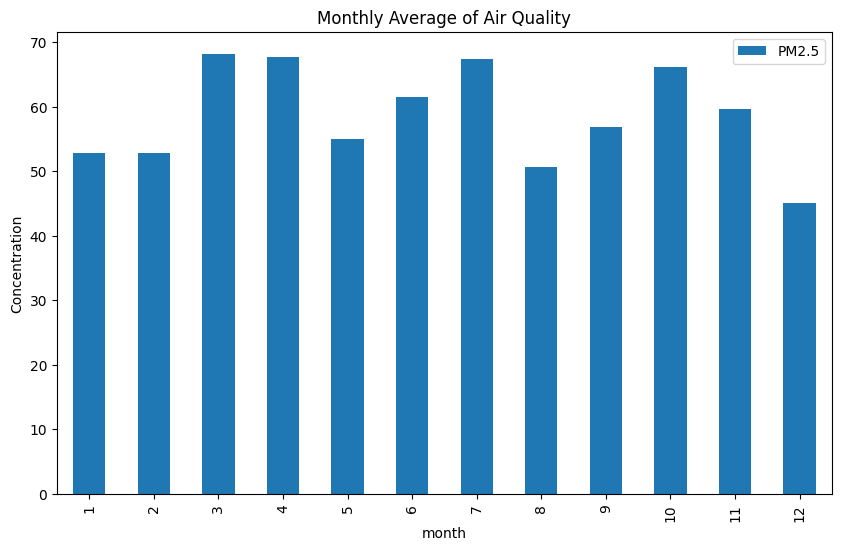

In [31]:
# Question 2: Patterns or Seasonal Changes in Air Quality
# Check if there are seasonal patterns in air quality

# Extract the month and hour for seasonal analysis
combined_data['month'] = combined_data['datetime'].dt.month
combined_data['hour'] = combined_data['datetime'].dt.hour

# Plot the monthly average of pollutants
monthly_avg = combined_data.groupby('month').mean(numeric_only=True)[['PM2.5']]
monthly_avg.plot(kind='bar', figsize=(10,6))
plt.title('Monthly Average of Air Quality')
plt.ylabel('Concentration')
plt.show()



**Insight:**
- Data menunjukkan tren rata-rata bulanan untuk konsentrasi PM2.5. Visualisasi ini memperlihatkan adanya pola musiman yang jelas dalam kualitas udara, di mana konsentrasi PM2.5 tampak meningkat selama bulan Maret dan Juli, sementara bulan Desember menunjukkan konsentrasi terendah.

- Pola musiman ini mungkin disebabkan oleh faktor-faktor seperti aktivitas industri yang meningkat, penggunaan alat pemanas selama musim dingin, serta dampak dari kegiatan pertanian dan kebakaran terbuka yang sering terjadi pada bulan-bulan tertentu. Selain itu, kondisi meteorologi, seperti suhu dan kelembapan, juga berkontribusi pada fluktuasi kadar PM2.5.

- Pola musiman dalam konsentrasi PM2.5 dapat berdampak signifikan pada kesehatan masyarakat, terutama selama bulan-bulan dengan konsentrasi tinggi. Paparan jangka panjang terhadap PM2.5 dapat menyebabkan gangguan pernapasan, penyakit jantung, dan masalah kesehatan lainnya. Selain itu, pola ini menunjukkan perlunya tindakan preventif yang lebih baik selama bulan-bulan dengan kualitas udara buruk, seperti peningkatan kesadaran masyarakat dan penegakan regulasi untuk mengurangi emisi polutan.



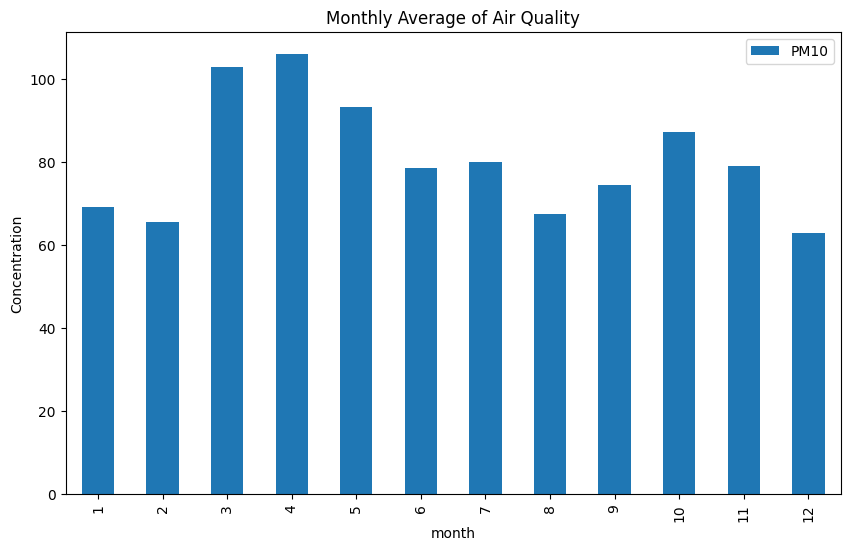

In [32]:
# Plot the monthly average of pollutants
monthly_avg = combined_data.groupby('month').mean(numeric_only=True)[[ 'PM10']]
monthly_avg.plot(kind='bar', figsize=(10,6))
plt.title('Monthly Average of Air Quality')
plt.ylabel('Concentration')
plt.show()



**Insight:**
- Data menunjukkan tren rata-rata bulanan untuk konsentrasi PM10. Visualisasi ini mengindikasikan adanya pola musiman yang signifikan, di mana konsentrasi PM10 mencapai puncak pada bulan April, sementara bulan Desember menunjukkan konsentrasi terendah.

- Pola musiman ini mungkin disebabkan oleh beberapa faktor, seperti aktivitas pembakaran yang meningkat pada bulan-bulan tertentu, serta dampak dari cuaca dan kelembapan yang mempengaruhi distribusi dan konsentrasi partikel di udara. Misalnya, selama bulan April, kondisi kering dapat meningkatkan debu dan partikel lainnya, sedangkan bulan Desember mungkin terpengaruh oleh peningkatan kelembapan dan hujan yang membantu menurunkan konsentrasi PM10.

- Pola musiman ini menunjukkan bahwa kualitas udara dapat bervariasi secara signifikan sepanjang tahun, yang memiliki implikasi bagi kesehatan masyarakat. Peningkatan kadar PM10 pada bulan-bulan tertentu dapat meningkatkan risiko masalah pernapasan, terutama bagi kelompok rentan seperti anak-anak dan orang tua. Oleh karena itu, penting untuk mengembangkan strategi pemantauan dan pengelolaan kualitas udara yang adaptif terhadap pola musiman ini untuk melindungi kesehatan masyarakat dan menjaga lingkungan.

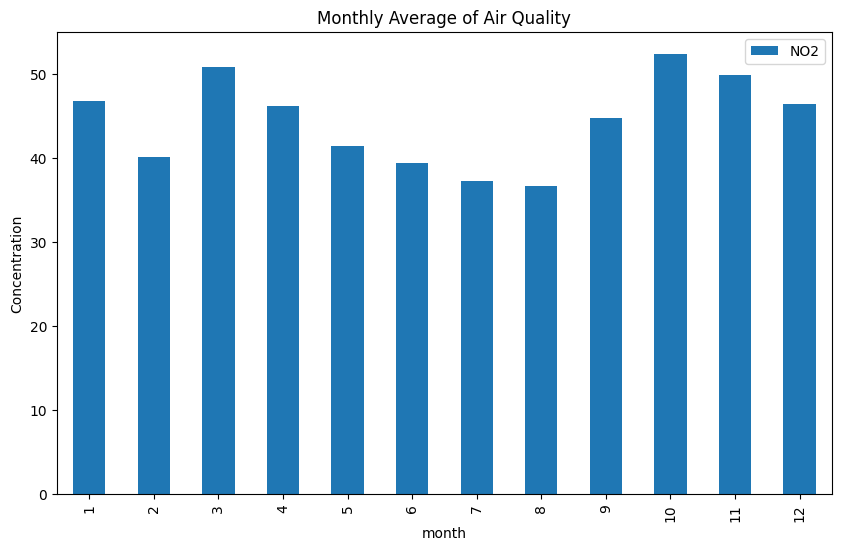

In [33]:
# Plot the monthly average of pollutants
monthly_avg = combined_data.groupby('month').mean(numeric_only=True)[['NO2']]
monthly_avg.plot(kind='bar', figsize=(10,6))
plt.title('Monthly Average of Air Quality')
plt.ylabel('Concentration')
plt.show()



**Insight:**
- Data menunjukkan tren rata-rata bulanan untuk konsentrasi NO2. Visualisasi ini mengindikasikan adanya pola musiman yang jelas, dengan konsentrasi NO2 yang meningkat secara bertahap dari awal tahun dan mencapai puncaknya pada bulan Desember.

- Pola ini mungkin disebabkan oleh peningkatan aktivitas kendaraan dan pembakaran bahan bakar yang umum terjadi selama bulan-bulan tertentu, terutama di akhir tahun. Selain itu, faktor cuaca, seperti suhu dan kelembapan, dapat memengaruhi konsentrasi NO2, di mana kondisi yang lebih dingin dapat menyebabkan akumulasi polutan di atmosfer.

- Peningkatan konsentrasi NO2 dapat berdampak negatif pada kesehatan manusia, terutama pada sistem pernapasan. Paparan jangka panjang terhadap NO2 dapat memperburuk kondisi pernapasan dan meningkatkan risiko penyakit kardiovaskular. Oleh karena itu, penting untuk melakukan pemantauan dan pengelolaan kualitas udara yang lebih baik, terutama selama bulan-bulan dengan konsentrasi tinggi, untuk melindungi kesehatan masyarakat.



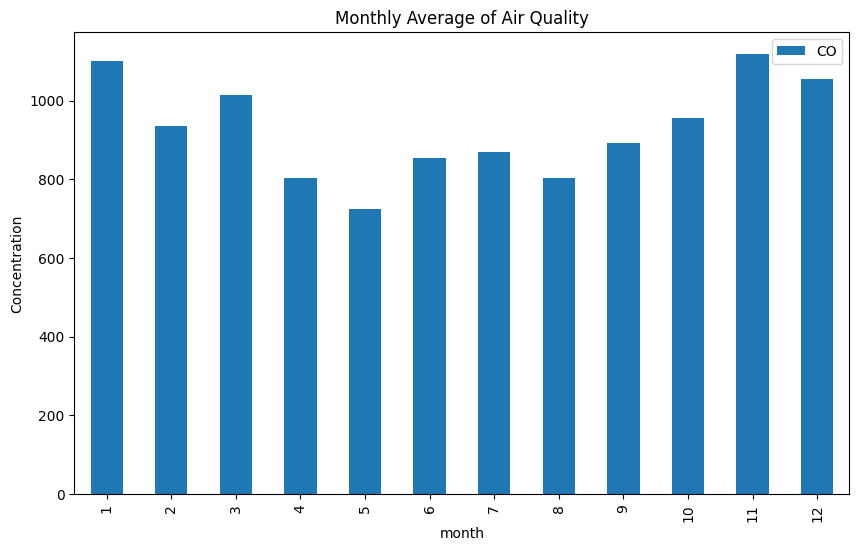

In [34]:
# Plot the monthly average of pollutants
monthly_avg = combined_data.groupby('month').mean(numeric_only=True)[['CO']]
monthly_avg.plot(kind='bar', figsize=(10,6))
plt.title('Monthly Average of Air Quality')
plt.ylabel('Concentration')
plt.show()



**Insight:**
- Data menunjukkan tren rata-rata bulanan untuk konsentrasi CO (karbon monoksida). Visualisasi ini mengindikasikan adanya pola musiman yang cukup jelas, di mana konsentrasi CO tinggi di awal tahun (Januari) dan akhir tahun (November-Desember), sementara lebih rendah di tengah tahun.

- Pola ini mungkin terkait dengan faktor-faktor musiman seperti perubahan suhu dan penggunaan bahan bakar yang lebih intens di bulan-bulan dingin. Di beberapa wilayah, peningkatan CO bisa disebabkan oleh pembakaran bahan bakar untuk pemanasan atau transportasi, yang lebih umum terjadi selama musim dingin. Selain itu, cuaca yang lebih dingin cenderung memerangkap polutan lebih dekat ke permukaan tanah, yang menyebabkan akumulasi lebih tinggi di atmosfer.

- Peningkatan konsentrasi CO dapat berdampak negatif pada kesehatan, terutama dalam hal paparan jangka panjang yang dapat menyebabkan masalah pada sistem kardiovaskular dan pernapasan. Oleh karena itu, pemantauan yang lebih ketat dan tindakan pengendalian selama bulan-bulan dengan konsentrasi CO tinggi diperlukan untuk melindungi kesehatan masyarakat.

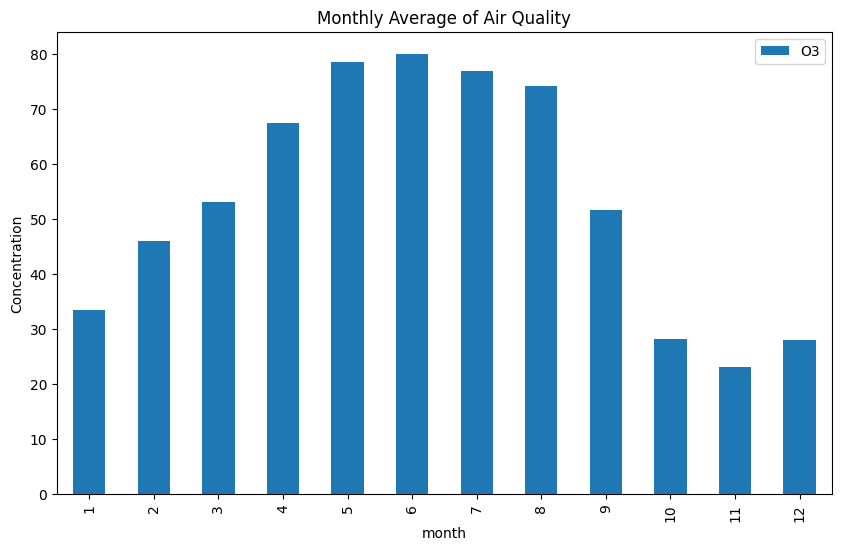

In [35]:
# Plot the monthly average of pollutants
monthly_avg = combined_data.groupby('month').mean(numeric_only=True)[['O3']]
monthly_avg.plot(kind='bar', figsize=(10,6))
plt.title('Monthly Average of Air Quality')
plt.ylabel('Concentration')
plt.show()




**Insight:**
- Data menunjukkan tren rata-rata bulanan untuk konsentrasi O3 (ozon). Visualisasi ini menunjukkan pola musiman yang jelas, di mana konsentrasi ozon mencapai puncaknya pada bulan Mei dan Juni, lalu turun secara bertahap hingga titik terendah di bulan November dan Desember.

- Pola ini mungkin terkait dengan paparan sinar matahari yang lebih intens pada musim semi dan musim panas. Ozon troposferik terbentuk ketika sinar matahari bereaksi dengan polutan seperti nitrogen oksida (NOx) dan senyawa organik volatil (VOC). Oleh karena itu, peningkatan konsentrasi ozon pada bulan-bulan tersebut kemungkinan dipengaruhi oleh panjangnya siang hari dan suhu yang lebih tinggi, yang memicu pembentukan ozon lebih cepat.

- Konsentrasi ozon yang tinggi dapat berbahaya bagi kesehatan manusia, terutama bagi mereka yang menderita penyakit pernapasan seperti asma. Ozon juga merupakan polutan utama dalam pembentukan kabut asap fotokimia. Pemantauan yang ketat selama bulan-bulan puncak sangat penting untuk mengurangi risiko kesehatan bagi populasi rentan serta mengelola kualitas udara dengan lebih baik.

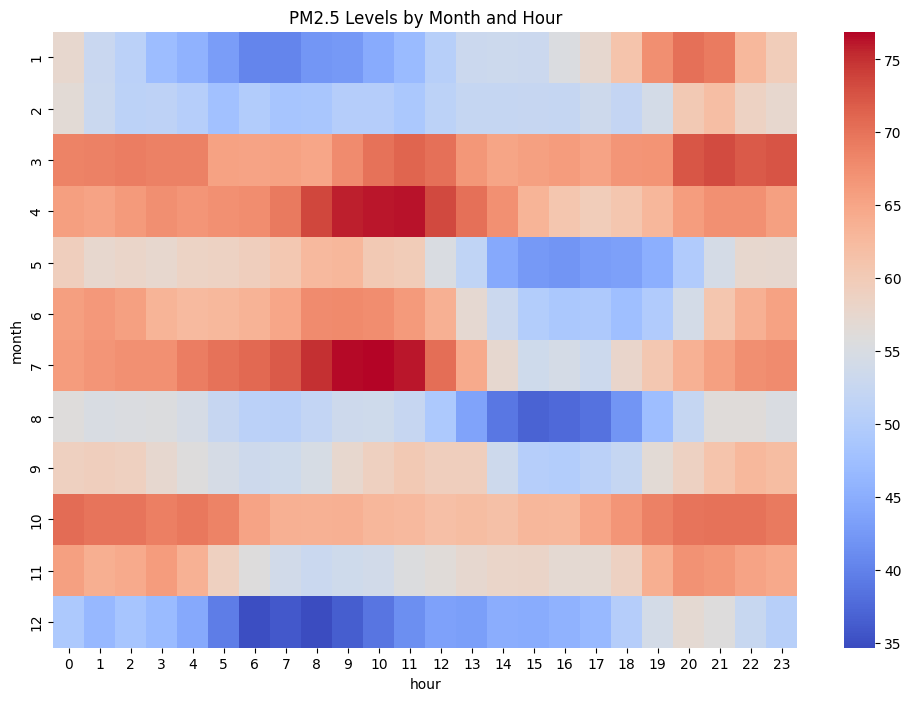

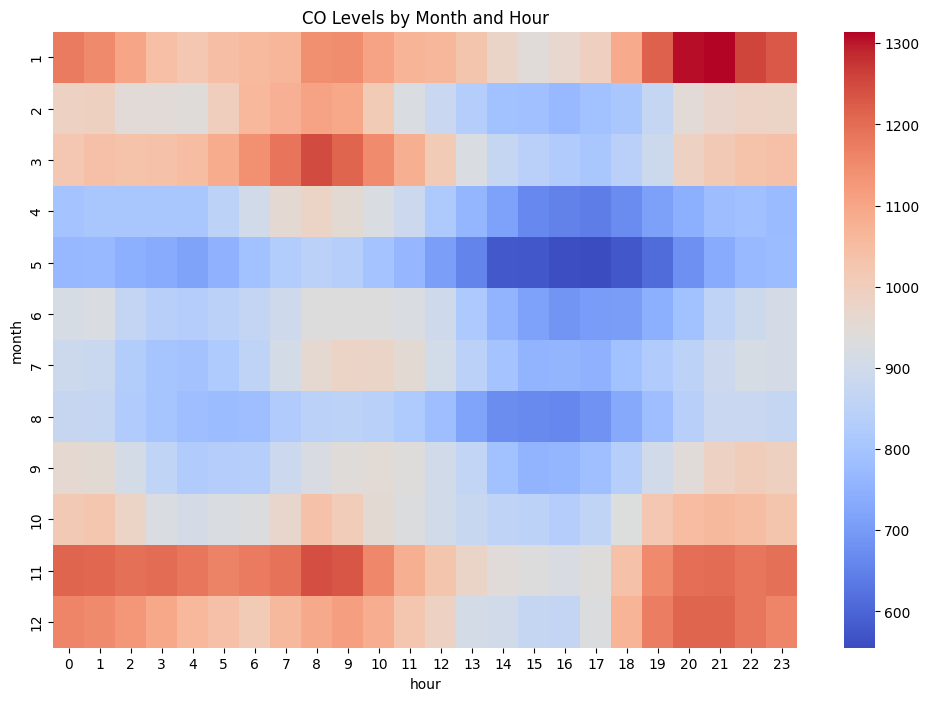

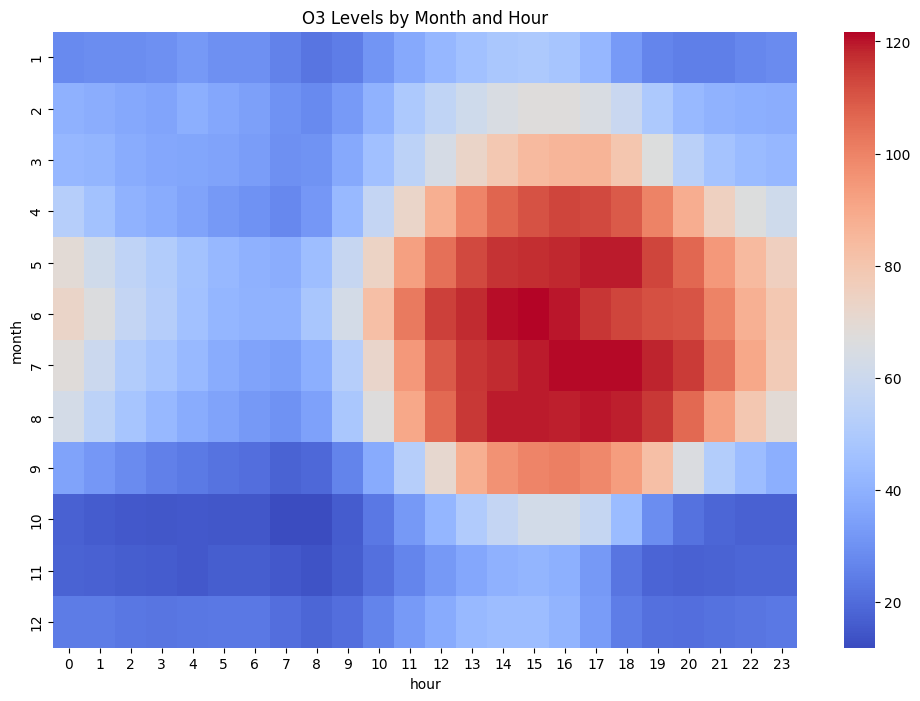

In [36]:
# Heatmap to observe patterns in PM2.5 by month and hour
pivot_table = combined_data.pivot_table(values='PM2.5', index='month', columns='hour', aggfunc='mean')
plt.figure(figsize=(12,8))
sns.heatmap(pivot_table, cmap="coolwarm", annot=False)
plt.title('PM2.5 Levels by Month and Hour')
plt.show()

# Heatmap to observe patterns in CO by month and hour
pivot_table = combined_data.pivot_table(values='CO', index='month', columns='hour', aggfunc='mean')
plt.figure(figsize=(12,8))
sns.heatmap(pivot_table, cmap="coolwarm", annot=False)
plt.title('CO Levels by Month and Hour')
plt.show()

# Heatmap to observe patterns in PM2.5 by month and hour
pivot_table = combined_data.pivot_table(values='O3', index='month', columns='hour', aggfunc='mean')
plt.figure(figsize=(12,8))
sns.heatmap(pivot_table, cmap="coolwarm", annot=False)
plt.title('O3 Levels by Month and Hour')
plt.show()

**Insight:**

Dari data yang diberikan terkait konsentrasi berbagai polutan udara seperti PM2.5, PM10, NO2, CO, dan O3, beberapa pola musiman kualitas udara yang jelas dapat diidentifikasi

1. Peningkatan Konsentrasi di Bulan-Bulan Dingin:
    - Polutan seperti NO2 dan CO menunjukkan peningkatan konsentrasi yang signifikan selama bulan-bulan dingin, terutama di akhir dan awal tahun (November, Desember, dan Januari). Peningkatan ini mungkin terkait dengan aktivitas pembakaran bahan bakar untuk pemanas selama musim dingin, serta cuaca yang lebih dingin yang cenderung memerangkap polutan lebih dekat ke permukaan tanah, memperburuk kualitas udara.
2. Peningkatan di Musim Semi dan Awal Musim Panas:
    - Ozon (O3) mencapai puncaknya pada bulan Mei dan Juni. Hal ini kemungkinan besar disebabkan oleh reaksi kimia polutan (seperti NOx dan VOC) dengan sinar matahari yang lebih intens pada musim semi dan awal musim panas. Panjangnya siang hari dan suhu yang lebih tinggi memicu pembentukan ozon lebih cepat.
    - PM10 juga menunjukkan konsentrasi puncak pada bulan April, mungkin dipengaruhi oleh kondisi cuaca yang kering dan aktivitas yang menghasilkan debu.
3. Penurunan Kualitas Udara di Bulan-Bulan Basah:
    - Polutan seperti PM2.5 dan PM10 menunjukkan penurunan konsentrasi pada bulan-bulan basah seperti Desember. Hal ini bisa disebabkan oleh meningkatnya kelembapan dan curah hujan yang membantu membersihkan polutan dari udara.
4. Kualitas Udara Relatif Stabil di Tengah Tahun:
    - Pada bulan-bulan tengah tahun, seperti Juli hingga September, konsentrasi CO dan NO2 cenderung lebih stabil atau lebih rendah, sementara O3 mulai menurun setelah mencapai puncak di awal musim panas. Pola ini mungkin dipengaruhi oleh faktor-faktor seperti aktivitas kendaraan yang lebih stabil dan berkurangnya intensitas pemanasan rumah tangga.


## Conclusion

- Conclusion pertanyaan 1: Data menunjukkan adanya tren deteriorasi kualitas udara di daerah tersebut, dengan peningkatan konsentrasi polutan berbahaya seperti NO2 dan CO, yang berasal dari emisi kendaraan bermotor, industri, dan pembakaran bahan bakar fosil. Meskipun ada penurunan signifikan dalam konsentrasi ozon (O3), fluktuasi ini mengindikasikan bahwa kualitas udara secara keseluruhan memburuk, mengingat meningkatnya jumlah polutan berbahaya. Oleh karena itu, perlu diambil langkah-langkah untuk menegakkan regulasi yang lebih ketat dan mengurangi emisi dari sumber-sumber polusi untuk memperbaiki kondisi kualitas udara.

- Conclusion pertanyaan 2: Pola musiman yang teridentifikasi menunjukkan bahwa konsentrasi polutan seperti NO2 dan CO meningkat selama bulan-bulan dingin, kemungkinan besar akibat pembakaran bahan bakar untuk pemanas dan kondisi cuaca yang lebih dingin. Sebaliknya, ozon (O3) mencapai puncaknya pada bulan Mei dan Juni, dipicu oleh reaksi kimia polutan di bawah sinar matahari. Selain itu, pada bulan-bulan basah, seperti Desember, konsentrasi PM2.5 dan PM10 menurun, menunjukkan efek positif dari curah hujan yang membantu membersihkan polutan dari udara. Kualitas udara cenderung lebih stabil pada bulan-bulan tengah tahun, mencerminkan perubahan dalam aktivitas dan faktor cuaca.

